# Analysis Arena  Project

   ## Analysing Pokemon data

Importing all the libraries we would need in this analysis.

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

We will use pokemon dataset for our analysis. In the dataset there are many features such as the name, abilities,type , base stats and generations of pokemon. We also have a feature "is_legendary", which would be used to classify the pokemon as legendary  or non legendary.

Lets import the pokemon data and read it.

In [217]:
df=pd.read_csv("pokemon.csv")
df.head(5)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

# Data cleaning
</b>
Data cleaning is one of the important step when analysing any dataset. This step tasks include handling missing values in data, formatting data to standardize it and make it consistent, normalizing data, grouping data values into bins, and converting categorical variables into numerical quantitative variables.

We can check if there are any duplicates in our dataset.

In [219]:
df.duplicated().sum()

0

Now there are no duplicates in our dataset.Lets look at any missing values.

In [220]:
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


We have 20 missing values in both "height_m" and "weight_kg" , columns. As the count of the missing values are less and these features are continuous in nature thus we can replace the missing value with the aggregate of those features.
</b>
First we will find the aggregate of thosecolumns and then replace the null values  with the aggregate value.

In [221]:
mean_kg=df['weight_kg'].mean()
df['weight_kg'].fillna(value=mean_kg,inplace=True)
mean_m=df["height_m"].mean()
df["height_m"].fillna(value=mean_m,inplace=True)

In [222]:
df["is_legendary"].value_counts()

is_legendary
0    731
1     70
Name: count, dtype: int64

Lets fill the null values in "type 1" and "percentage_male" column to "None"

In [223]:
df['type2'].fillna('None',inplace=True)
df['percentage_male'].fillna('None',inplace=True)

Renaming the type1 and type 2 as Primary and Secondary Type

In [224]:
df.rename(columns={"type1":"Primary_Type","type2":"Secondary_Type"},inplace=True)

Notice that the "capture_rate" datatype is "object" but as we can see the values are of "int"datatype. 
</br>

lets see why is the "capture_rate" datatype is object.

In [225]:
for i in df['capture_rate']:
    print(i,end=",")

45,45,45,45,45,45,45,45,45,255,120,45,255,120,45,255,120,45,255,127,255,90,255,90,190,75,255,90,235,120,45,235,120,45,150,25,190,75,170,50,255,90,255,120,45,190,75,190,75,255,50,255,90,190,75,190,75,190,75,255,120,45,200,100,50,180,90,45,255,120,45,190,60,255,120,45,190,60,190,75,190,60,45,190,45,190,75,190,75,190,60,190,90,45,45,190,75,225,60,190,60,90,45,190,75,45,45,45,190,60,120,60,30,45,45,225,75,225,60,225,60,45,45,45,45,45,45,45,255,45,45,35,45,45,45,45,45,45,45,45,45,45,25,3,3,3,45,45,45,3,45,45,45,45,45,45,45,45,45,45,255,90,255,90,255,90,255,90,90,190,75,190,150,170,190,75,190,75,235,120,45,45,190,75,65,45,255,120,45,45,235,120,75,255,90,45,45,30,70,45,225,45,60,190,75,190,60,25,190,75,45,25,190,45,60,120,60,190,75,225,75,60,190,75,45,25,25,120,45,45,120,60,45,45,45,75,45,45,45,45,45,30,3,3,3,45,45,45,3,3,45,45,45,45,45,45,45,45,45,45,255,127,255,90,255,120,45,120,45,255,120,45,255,120,45,200,45,190,45,235,120,45,200,75,255,90,255,120,45,255,120,45,190,120,45,180,200,150,255,

As we can see that there is one value in capture rate (i.e."30 (Meteorite)255 (Core)" ) which is changing the datatype to object.
</br>

Let's replace this value with an integer and then convert the "capture rate" column datatype to integer

In [226]:
df["capture_rate"].replace({'30 (Meteorite)255 (Core)':'30'},inplace=True)
df['capture_rate']=df['capture_rate'].astype('int')
df['capture_rate'].dtype

dtype('int32')

In [227]:
df.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
Primary_Type         0
Secondary_Type       0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

Now lets convert the abilities of the a specific pokemon to integer, by calculating the total number of abilities of that pokemon.

In [228]:
df['total_abilities']=df.apply(lambda x: len(x['abilities']),axis=1)

Now take only those columns that we will use.

In [229]:
data=df[["name","hp","attack","defense","sp_defense","sp_attack","generation","speed","base_total","base_egg_steps","base_happiness","weight_kg","height_m",
         "Primary_Type","Secondary_Type","abilities","total_abilities","capture_rate","is_legendary"]]
data.head()

,name,hp,attack,defense,sp_defense,sp_attack,generation,speed,base_total,base_egg_steps,base_happiness,weight_kg,height_m,Primary_Type,Secondary_Type,abilities,total_abilities,capture_rate,is_legendary
0,Bulbasaur,45,49,49,65,65,1,45,318,5120,70,6.9,0.7,grass,poison,"['Overgrow', 'Chlorophyll']",27,45,0
1,Ivysaur,60,62,63,80,80,1,60,405,5120,70,13.0,1.0,grass,poison,"['Overgrow', 'Chlorophyll']",27,45,0
2,Venusaur,80,100,123,120,122,1,80,625,5120,70,100.0,2.0,grass,poison,"['Overgrow', 'Chlorophyll']",27,45,0
3,Charmander,39,52,43,50,60,1,65,309,5120,70,8.5,0.6,fire,None,"['Blaze', 'Solar Power']",24,45,0
4,Charmeleon,58,64,58,65,80,1,80,405,5120,70,19.0,1.1,fire,None,"['Blaze', 'Solar Power']",24,45,0


In [230]:
from sklearn import preprocessing 
LE=preprocessing.LabelEncoder()
df['generation']=LE.fit_transform(df.generation)
print(df['generation'].value_counts())

generation
4    156
0    151
2    135
3    107
1    100
6     80
5     72
Name: count, dtype: int64


### Explortory Data Analysis

Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected. EDA is an important second step in any data analysis.

<b> 1. Lets see the corelation between different features of pokemon dataset.<b>

<Axes: >

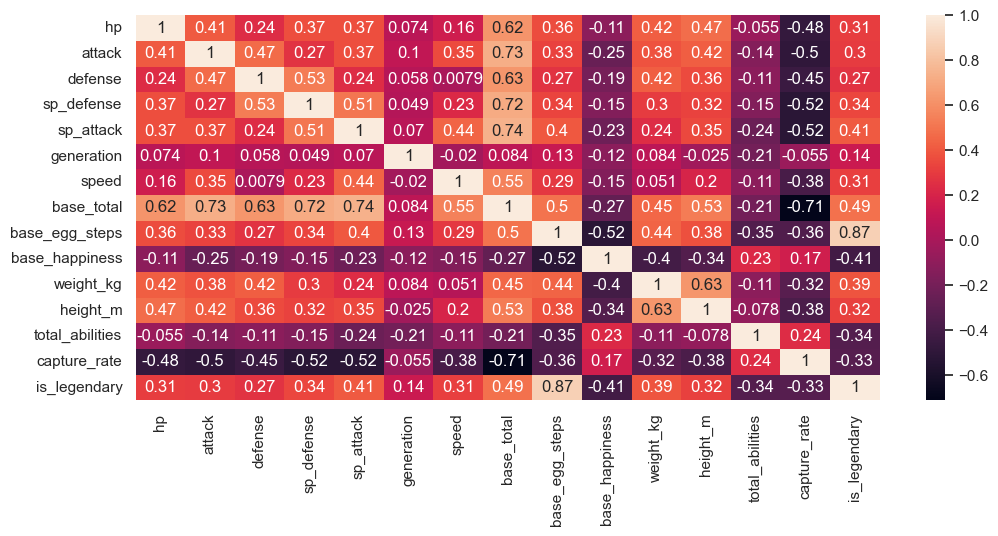

In [231]:
# corelation
correlation=data.corr(numeric_only=True)
plt.figure(figsize=(12,5))
sns.heatmap(correlation,annot=True)

1.Base total (base_total) has a good correlation with the attack and defense attributes. For example,
+ base_total with attack: 0.73
+ base_total with sp.attack: 0.74
+ base_total with defense: 0.63
+ base_total with sp.defense: 0.72

2.The Weight of the pokemon is dependent and correlated with the Height of the pokemon.
</br>
3.A pokemon being legendary has a huge correlation with the pokemon’s Egg Steps (i.e. 0.87).

<b>2. Lets visualize the correaltion between base stats</b>

C:\Users\SB INFO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


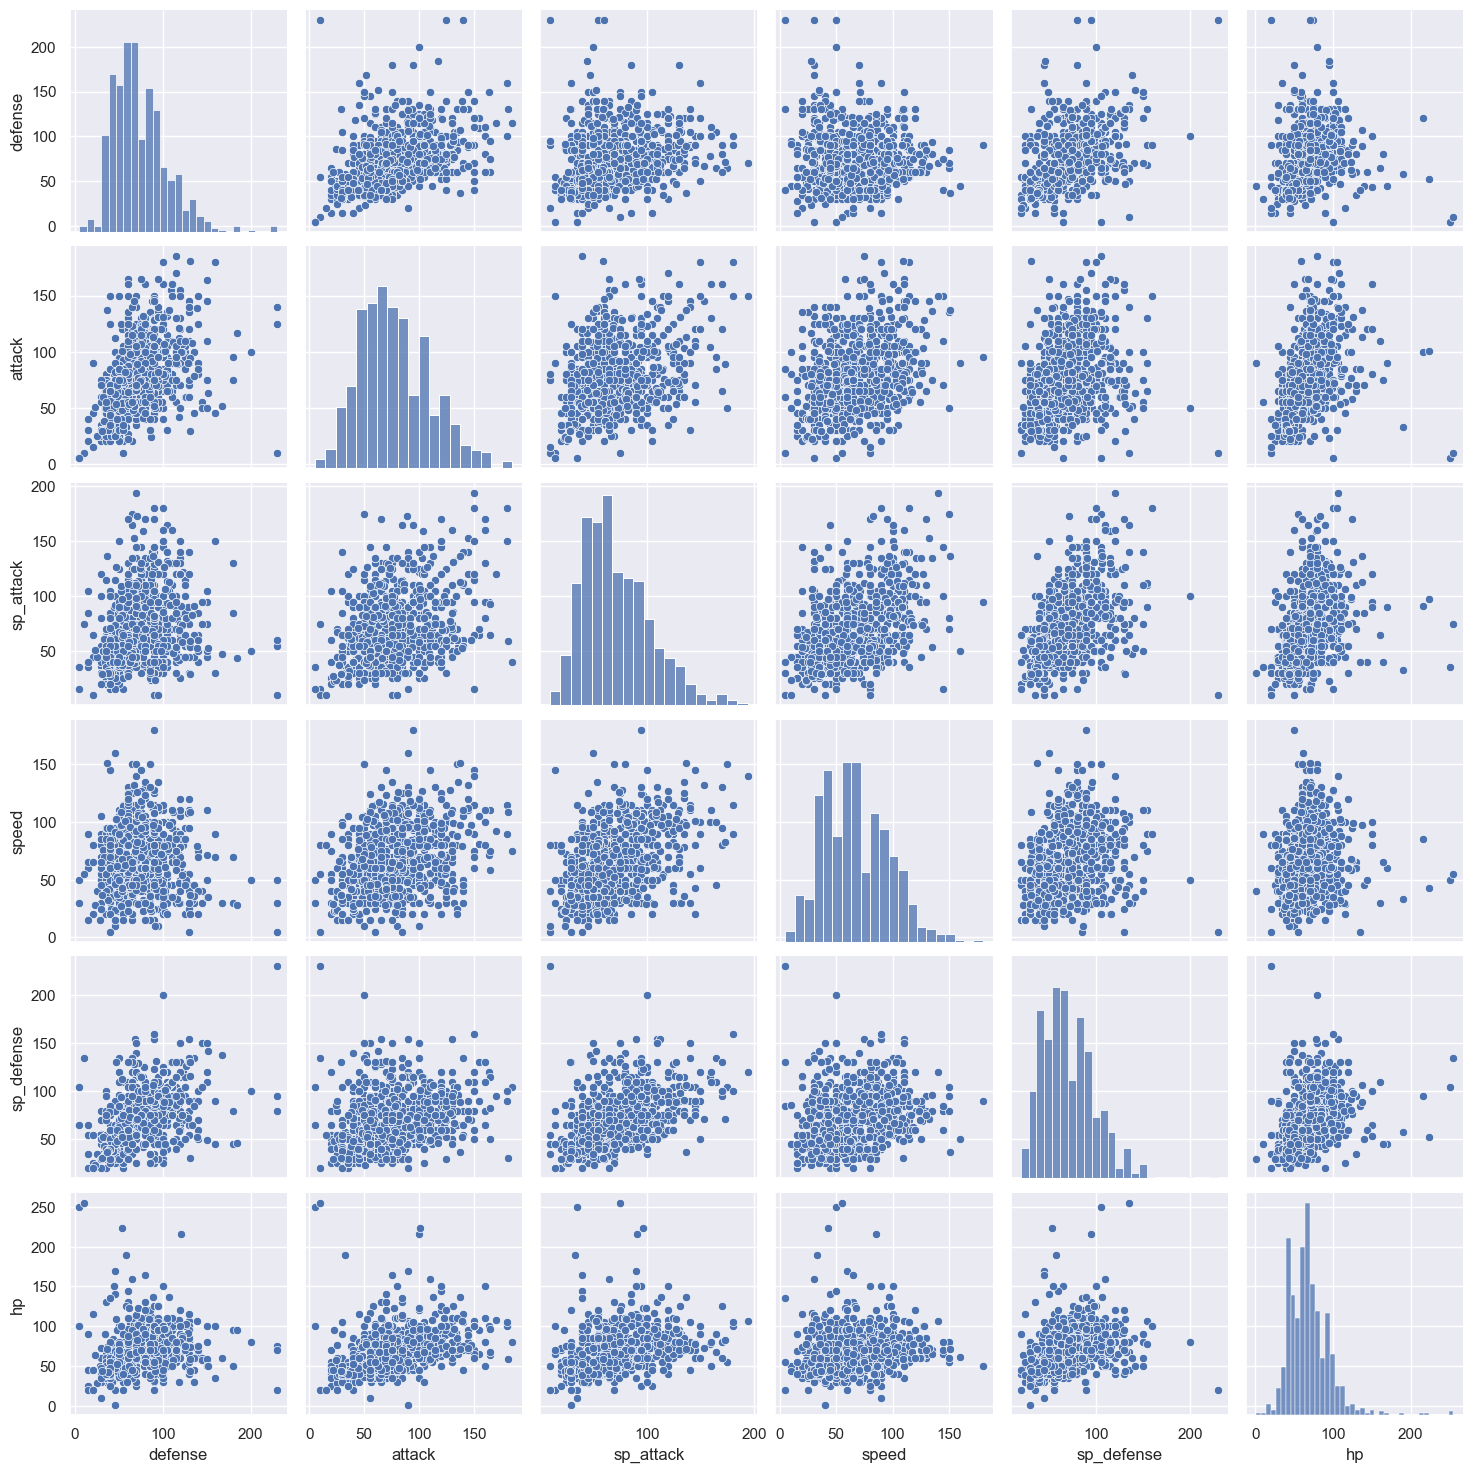

In [232]:
# scatter plot
base_stats=data[["defense","attack","sp_attack","speed","sp_defense","hp"]]
sns.set_style("darkgrid")
sns.pairplot(base_stats)

As we know that there are many features like <i>hp</i>(The Base HP of the Pokémon.),<i>attack</i>(The Base Attack of the Pokémon),<i>defense</i>(The Base Defense of the Pokémon),<i>sp_attack</i>(The Base Special Attack of the Pokémon),<i>sp_Defense</i>(The Base Special Defense of the Pokémon),<i>speed</i>(The Base Speed of the Pokémon) of the pokemon that makes these featureses as base statistics of the pokemon.

<b>3. Lets see how the base stats are distributed.</b>

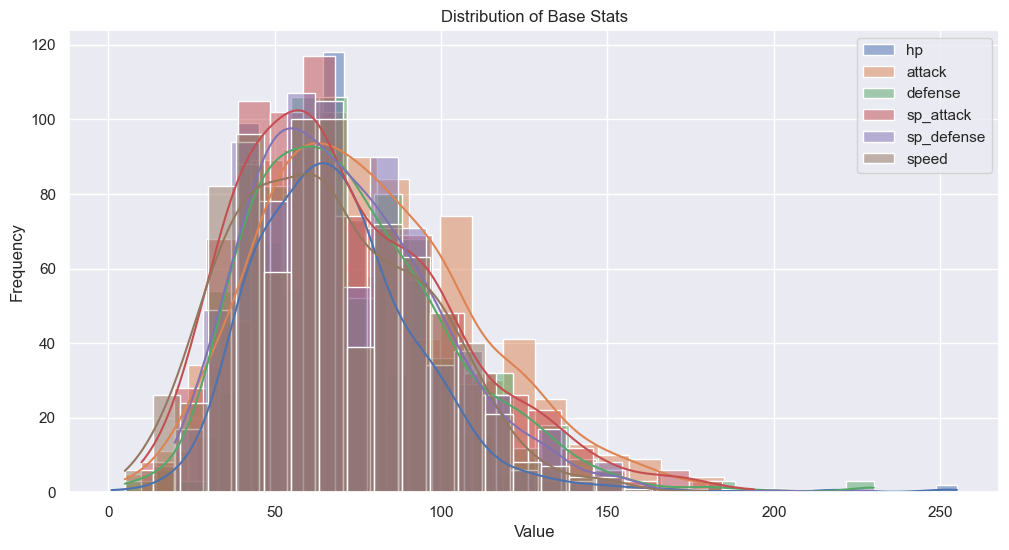

In [233]:
sns.set(style='darkgrid')

# Plot distribution of base stats
base_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

plt.figure(figsize=(12, 6))
for base in base_stats:
    sns.histplot(data[base], kde=True, label=base)
plt.legend()
plt.title('Distribution of Base Stats')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

All the base stats seems to be mnormally distributed.

<b> 4. Lets visualize the "is_legendary" column</b>
+ Lets see the total percentage of legendary vs non legendary pokemon 

In [234]:
# count the legendary values
data['is_legendary'].value_counts()

is_legendary
0    731
1     70
Name: count, dtype: int64

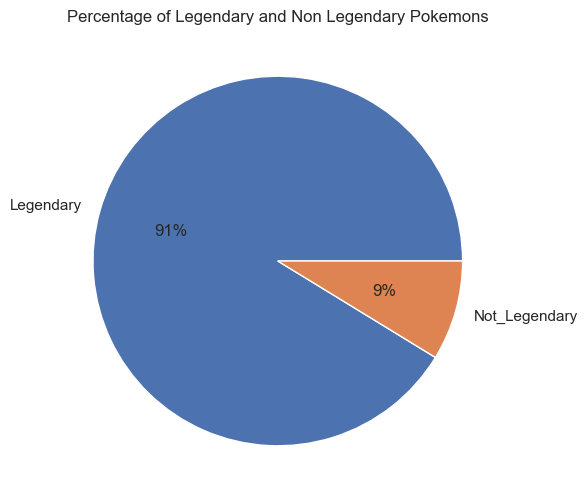

In [235]:
# percentage of Legendary and Non Legendary Pokemons
plt.figure(figsize=(8,6))
keys=['Legendary',"Not_Legendary"]
plt.pie(data['is_legendary'].value_counts(),labels=keys,autopct='%.0f%%')
plt.title("Percentage of Legendary and Non Legendary Pokemons")
plt.show()

<i>As we can see, 90 percentage of pokemons are legendary and 10 percentage of pokemons are not legendary</i>

+ Lets see the distribution of base total with respect ot "is_legendary" column.

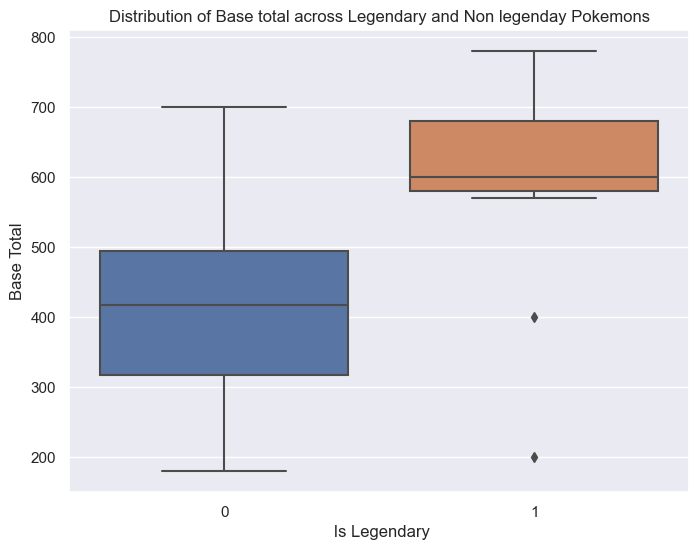

In [236]:
# is legendary
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.boxplot(x=data['is_legendary'],y=data["base_total"])
plt.xlabel(" Is Legendary")
plt.ylabel("Base Total")
plt.title("Distribution of Base total across Legendary and Non legenday Pokemons")
plt.show()

<b>5. What are the most widespread types of pokemon in both primary and secondary types?</b>

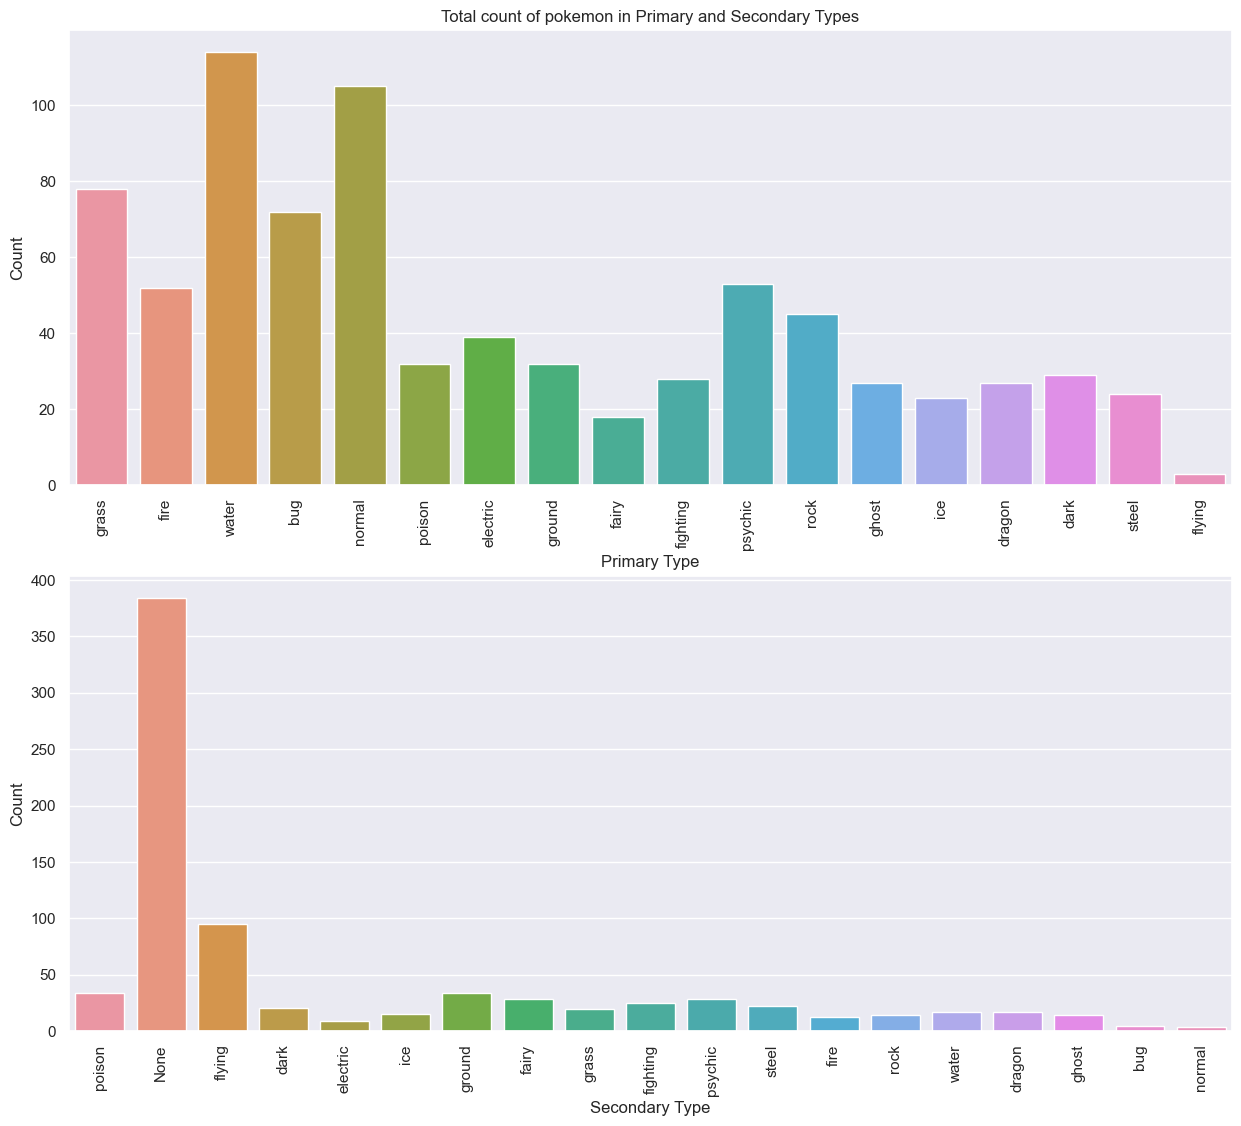

In [237]:
# count plot->primary pokemon types
plt.figure(figsize=(15,13))

# first subplot

plt.subplot(2,1,1)
sns.countplot(data,x='Primary_Type')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.title("Total count of pokemon in Primary and Secondary Types")
plt.xlabel("Primary Type")
plt.ylabel("Count")

# second subplot

plt.subplot(2,1,2)
sns.set_style("darkgrid")
sns.countplot(data,x=data['Secondary_Type'])
plt.xlabel("Secondary Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

1.The most widespread type of pokemon in:

+ Primary Type = Water type pokemon
+ Secondary Type = Flying-type pokemons (as this is a secondary type so most of the pokemon have no secondary type)

2.The least widespread type of pokemon in:

+ Primary Type = Flying-type pokemon
+ Secondary Type = Normal-type pokemons

Note that while there is most number of pokemons with Flying-type in their secondary type yet the flying type has the least number in the primary type.

<b>6. What is the count of pokemon per generation?</b>

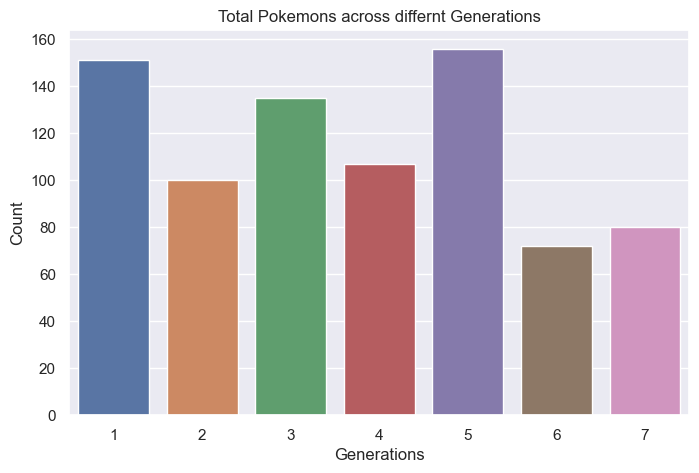

In [238]:
# count plot for diffrent generation
plt.figure(figsize=(8,5))
sns.countplot(data,x=data['generation'])
plt.xlabel("Generations")
plt.ylabel("Count")
plt.title("Total Pokemons across differnt Generations")
sns.set_style("darkgrid")
plt.show()

Maximum number of pokemons are in 0th and 4th generation(around 150 pokemons). and minimum number of pokemons are in the 5th generation(around 70 pokemons).

<b>7. Are there any significant differences in base stats between generations?</b>

                   hp     attack    defense  sp_attack  sp_defense      speed
generation                                                                   
1           64.344371  74.529801  70.079470  69.403974   67.741722  70.152318
2           70.980000  69.960000  71.790000  65.400000   73.440000  61.610000
3           65.666667  77.185185  72.637037  71.562963   69.392593  63.577778
4           73.102804  82.672897  76.168224  74.635514   74.523364  70.074766
5           70.314103  80.557692  71.961538  69.974359   67.711538  66.519231
6           71.111111  76.527778  73.555556  76.569444   73.194444  66.652778
7           70.575000  84.637500  78.012500  75.250000   75.650000  64.037500


Text(0.5, 1.0, 'Average values of Base Stats across different Generations')

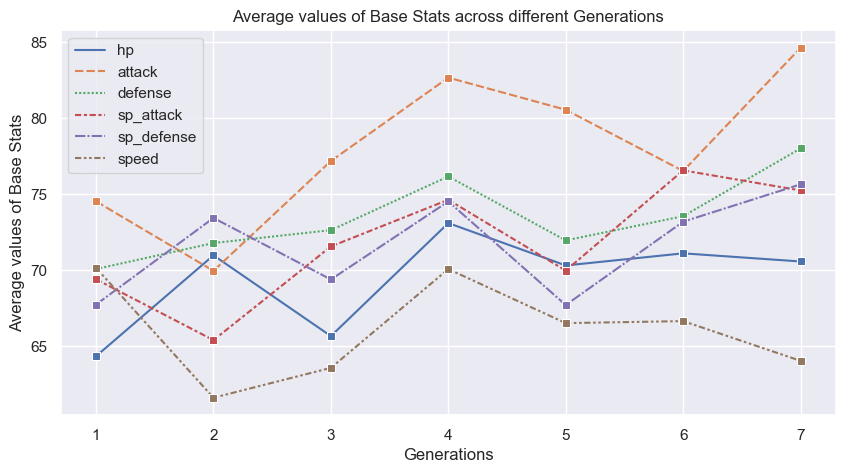

In [239]:
#  grouping base stats with respect to diff generations

stats=data[["generation","hp","attack","defense","sp_attack","sp_defense","speed"]]
gen_stats=stats.groupby(["generation"]).mean()
# statistical value
print(gen_stats)

# visualizing it

sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=gen_stats,marker="s")
plt.xlabel("Generations")
plt.ylabel("Average values of Base Stats")
plt.title("Average values of Base Stats across different Generations")


<b>8. How do the heights and weights of Pokémon vary across different types and generations?</b>

            height_m  weight_kg
generation                     
1           1.232120  47.681496
2           1.163000  49.105000
3           1.229630  67.077778
4           1.133645  76.885047
5           1.032051  52.402564
6           1.093943  52.352474
7           1.285799  97.838476


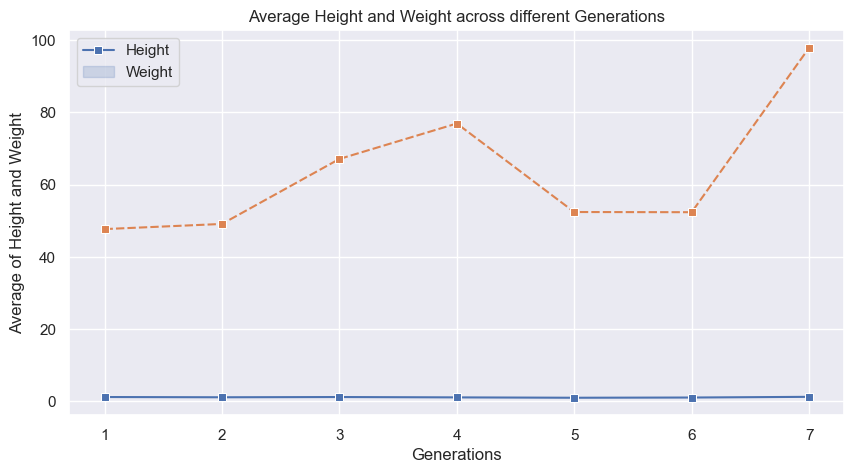

In [240]:
# grouping height and weight with respect to diff generations
measure=data[['generation',"height_m","weight_kg"]]
grouped=measure.groupby("generation").mean()

# statistical value
print(grouped)

# visualizing it
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.lineplot(data=grouped,marker="s")
plt.xlabel("Generations")
plt.ylabel("Average of Height and Weight")
plt.title("Average Height and Weight across different Generations")
plt.legend(['Height','Weight'])
plt.show()

As we can see that that weight is changing in every generation but that's not the case with height, height remains almost same along every generation.

<b>9. How do the base stats of legendary Pokémon compare to non-legendary Pokémon?</b>

([<matplotlib.axis.XTick at 0x1f883e7ba90>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

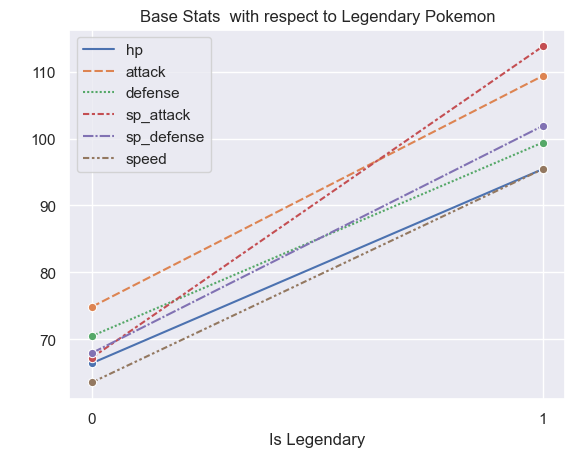

In [241]:
#grouping base stats with respect to islegendary values

legendary=data[["hp","attack","defense","sp_attack","sp_defense","speed","is_legendary"]]
grouped=legendary.groupby(['is_legendary']).mean()
sns.set_style("darkgrid")
sns.lineplot(data=grouped,marker="o")
plt.xlabel("Is Legendary")
plt.title("Base Stats  with respect to Legendary Pokemon")
plt.ylabel(" ")
plt.xticks([0,1])

<b>10. Which type has the easiest pokemon to catch?</b>

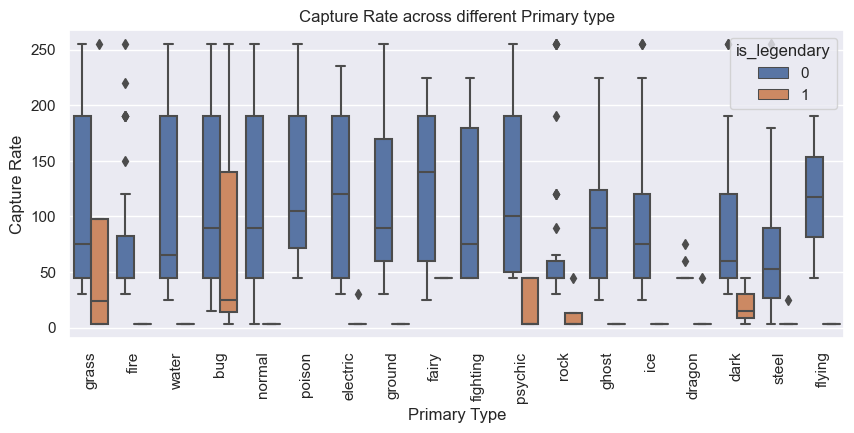

In [242]:
# plotting capture rate acoss diff primary types
plt.figure(figsize=(10,4))
sns.boxplot(x=data['Primary_Type'],y=data['capture_rate'],hue=data["is_legendary"])
plt.xlabel("Primary Type")
plt.ylabel("Capture Rate")
plt.title("Capture Rate across different Primary type")
plt.xticks(rotation=90)
plt.show()

The easiest pokemon to capture is from the “Fairy Type” whereas the hardest to capture is “Dragon-Type”. Also, it’s pretty hard to capture the “Fire Type” or “Rock Type” pokemons. On the other hand in Legendary pokemons, the easiest pokemon to capture will be from the “Grass or Bug” type.

C:\Users\SB INFO\AppData\Local\Temp\ipykernel_14964\2997300188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['capture_rate'] = pd.to_numeric(df['capture_rate'], errors='coerce')


Text(0, 0.5, 'Frequency')

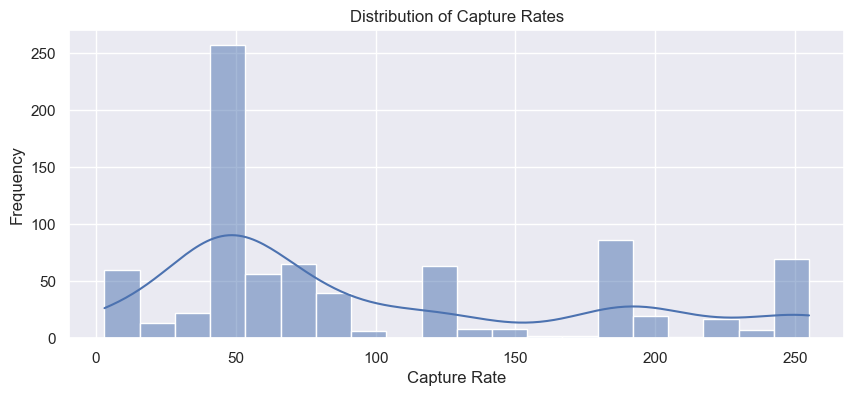

In [243]:
data['capture_rate'] = pd.to_numeric(df['capture_rate'], errors='coerce')

# Distribution of capture rates
plt.figure(figsize=(10, 4))
sns.set_style("darkgrid")
sns.histplot(df['capture_rate'].dropna(), bins=20, kde=True)
plt.title('Distribution of Capture Rates')
plt.xlabel('Capture Rate')
plt.ylabel('Frequency')


This plot is a histogram showing the distribution of capture rates by displaying the frequency of capture rates across the dataset.

### Prediction 

The last step involves prediction wheather an pokemon given its features is an legebdary pokemon or nont. I am gonna make logistic regression model to predict the outcomes. 
</br>
Binary logistic regression is used to predict the probability of a binary outcome, such as yes or no, true or false, or 0 or 1.
</br>
+ In our case , we need to predict if the pokemon is legendary or not(i.e. ,1 or 0). And we need to find the probability of a pokemon being legendary. So we will use Logistic regression as our Machine Learning model.
+ It's also popular choice because it's easy to implement, interpret, and train. 
+ Logistic regression also has fewer parameters to tune, making it less prone to overfitting.

Let's define X, and Y for our dataset:

In [244]:
X=np.asarray(df[["height_m","weight_kg","generation","hp","attack","defense","sp_attack","sp_defense",
                   "speed","base_total"]])
Y=np.asarray(df['is_legendary'])
print(X[0:5])
print(Y[0:5])

[[7.00e-01 6.90e+00 0.00e+00 4.50e+01 4.90e+01 4.90e+01 6.50e+01 6.50e+01
  4.50e+01 3.18e+02]
 [1.00e+00 1.30e+01 0.00e+00 6.00e+01 6.20e+01 6.30e+01 8.00e+01 8.00e+01
  6.00e+01 4.05e+02]
 [2.00e+00 1.00e+02 0.00e+00 8.00e+01 1.00e+02 1.23e+02 1.22e+02 1.20e+02
  8.00e+01 6.25e+02]
 [6.00e-01 8.50e+00 0.00e+00 3.90e+01 5.20e+01 4.30e+01 6.00e+01 5.00e+01
  6.50e+01 3.09e+02]
 [1.10e+00 1.90e+01 0.00e+00 5.80e+01 6.40e+01 5.80e+01 8.00e+01 6.50e+01
  8.00e+01 4.05e+02]]
[0 0 0 0 0]


Also, we normalize the dataset:

In [245]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.44, -0.5 , -1.39, -0.9 , -0.9 , -0.78, -0.2 , -0.21, -0.74,
        -0.93],
       [-0.15, -0.45, -1.39, -0.34, -0.49, -0.33,  0.27,  0.33, -0.22,
        -0.2 ],
       [ 0.78,  0.36, -1.39,  0.42,  0.69,  1.63,  1.57,  1.76,  0.47,
         1.65],
       [-0.53, -0.49, -1.39, -1.13, -0.8 , -0.98, -0.35, -0.75, -0.05,
        -1.  ],
       [-0.06, -0.39, -1.39, -0.41, -0.43, -0.49,  0.27, -0.21,  0.47,
        -0.2 ]])

### Train/Test dataset

We split our dataset into train and test set:

In [246]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print("Test Size:", X_test.shape)
print("Train size :",X_train.shape)

Test Size: (161, 10)
Train size : (640, 10)


<h3 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h3>

Let's build our model using LogisticRegression from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now let's fit our model with train set:

In [247]:

LR=LogisticRegression(C=0.01,solver="liblinear").fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:

In [248]:
y_hat=LR.predict(X_test)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0], dtype=int64)

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [249]:
# accuray
yhat_proba=LR.predict_proba(X_test)
yhat_proba

array([[0.9 , 0.1 ],
       [0.79, 0.21],
       [0.65, 0.35],
       [0.64, 0.36],
       [0.85, 0.15],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.72, 0.28],
       [0.49, 0.51],
       [0.76, 0.24],
       [0.71, 0.29],
       [0.69, 0.31],
       [0.88, 0.12],
       [0.91, 0.09],
       [0.87, 0.13],
       [0.72, 0.28],
       [0.87, 0.13],
       [0.82, 0.18],
       [0.46, 0.54],
       [0.86, 0.14],
       [0.58, 0.42],
       [0.75, 0.25],
       [0.76, 0.24],
       [0.79, 0.21],
       [0.86, 0.14],
       [0.82, 0.18],
       [0.88, 0.12],
       [0.87, 0.13],
       [0.79, 0.21],
       [0.65, 0.35],
       [0.79, 0.21],
       [0.86, 0.14],
       [0.82, 0.18],
       [0.65, 0.35],
       [0.67, 0.33],
       [0.69, 0.31],
       [0.36, 0.64],
       [0.78, 0.22],
       [0.71, 0.29],
       [0.88, 0.12],
       [0.78, 0.22],
       [0.86, 0.14],
       [0.75, 0.25],
       [0.84, 0.16],
       [0.75, 0.25],
       [0.73, 0.27],
       [0.87, 0.13],
       [0.61,

<h3 id="evaluation">Evaluation</h3>

#### jaccard index
Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0

In [250]:
# jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(Y_test,y_hat,pos_label=0)

0.9545454545454546

#### confusion matrix
Another way of looking at the accuracy of the classifier is to look at __confusion matrix__.

In [251]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation=None, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, y_hat, labels=[0,1]))

[[147   2]
 [  5   7]]


Confusion matrix, without normalization
[[  7   5]
 [  2 147]]


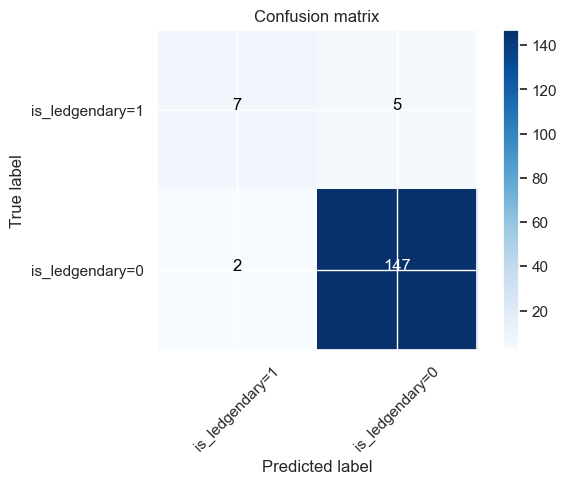

In [253]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['is_ledgendary=1','is_ledgendary=0'],normalize= False,  title='Confusion matrix')

Let's look at first row. The first row is for pokemons whose actual legendary value in the test set is 1.
As you can calculate, out of 172 pokemons, the legendary value of 12 of them is 1. 
Out of these 12 cases, the classifier correctly predicted 7 of them as 1, and 5 of them as 0. 

This means, for 7 pokemons, the actual legendary value was 1 in test set and classifier also correctly predicted those as 1. However, while the actual label of 5 pokemons was 1,but  the classifier predicted those as 0, which is not very good. We can consider it as the error of the model for first row.

What about the pokemon with legendary value 0? Lets look at the second row. It looks like there were 149 pokemons whom their legendary value were 0.

The classifier correctly predicted 147 of them as 0, and two of them wrongly as 1. So, it has done a good job in predicting the pokemons with legendary value 0. A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes. In a specific case of the binary classifier, such as this example, we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.

In [205]:
print(classification_report(Y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       149
           1       0.50      0.17      0.25        12

    accuracy                           0.93       161
   macro avg       0.72      0.58      0.61       161
weighted avg       0.90      0.93      0.91       161



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate the precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.91 in our case.

#### Log Loss
Now, let's try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [115]:
from sklearn.metrics import log_loss
log_loss(Y_test, yhat_proba)

0.3229659204291484